In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats # for QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

Removing missing values in Age

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
x = df.iloc[:, 1:3]
y = df.iloc[:, :1]

In [ ]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# 1. Log transform

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

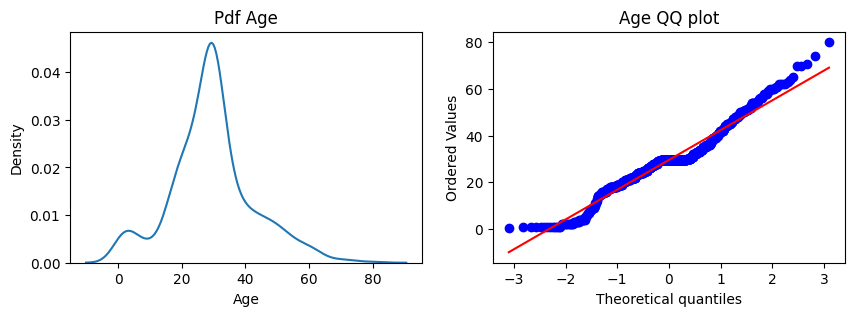

In [ ]:
# plt.figure(figsize=(14, 4))
# plt.subplot(121)
# sns.kdeplot(X_train["Age"])
# plt.title("Age Pdf")

# plt.subplot(122)
# sns.kdeplot(X_train["Fare"])
# plt.title("Fare pdf")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

ax1.set_title("Pdf Age")
sns.kdeplot(X_train["Age"], ax=ax1)

ax2.set_title("Age QQ plot")
stats.probplot(X_train["Age"], dist="norm" ,plot=ax2)
plt.title("Age QQ plot")

plt.show()

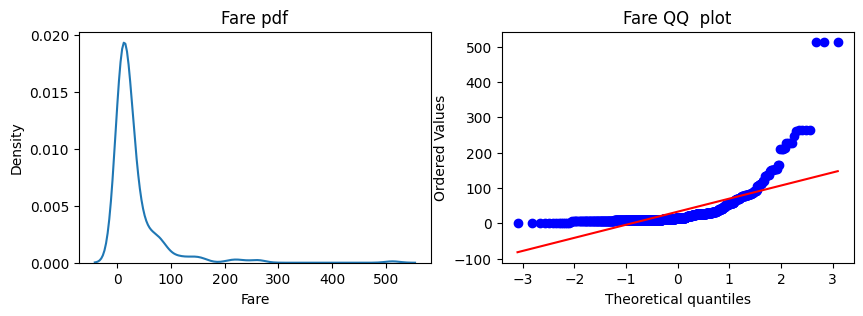

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

ax1.set_title("Fare pdf")
sns.kdeplot(X_train["Fare"], ax=ax1)

stats.probplot(X_train["Fare"], dist="norm", plot=ax2)
plt.title("Fare QQ  plot")

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

c:\Users\thahi\codes\lifeCodes\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [ ]:
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy of DT: ", accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6480446927374302
Accuracy of DT:  0.6927374301675978


Making a function transformer

In [ ]:
trf = FunctionTransformer(func=np.log1p)

# np.log - will just apply log
# np.log1p - will first add 1 to the value and then take log. This ensure there are no zero values

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test) 

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

c:\Users\thahi\codes\lifeCodes\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

In [ ]:
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy of DT: ", accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6815642458100558
Accuracy of DT:  0.6759776536312849


Plotting graphs and seeing improvement

Text(0.5, 1.0, 'Pdf of Fare after log transform')

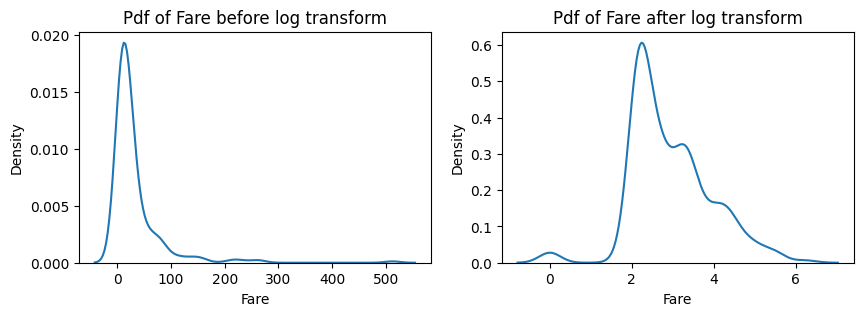

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

sns.kdeplot(X_train["Fare"], ax=ax1)
ax1.set_title("Pdf of Fare before log transform")

sns.kdeplot(X_train_transformed["Fare"], ax=ax2)
ax2.set_title("Pdf of Fare after log transform")

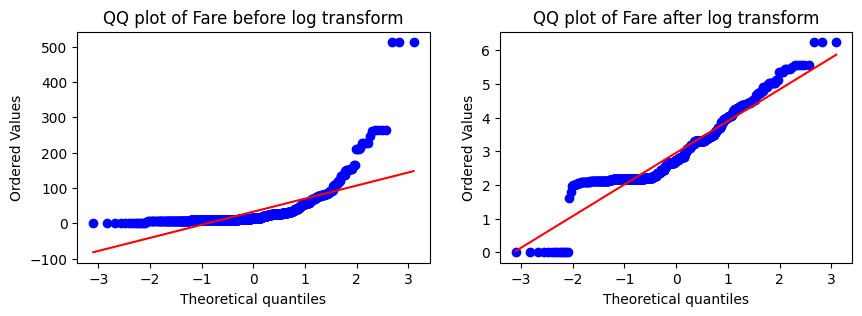

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

stats.probplot(X_train["Fare"], dist="norm", plot=ax1)
ax1.set_title("QQ plot of Fare before log transform")

stats.probplot(X_train_transformed["Fare"], dist="norm", plot=ax2)
ax2.set_title("QQ plot of Fare after log transform")

plt.show()


# 2. Reciprocal transform

In [ ]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    Y = df.iloc[:, 0]

    trf = ColumnTransformer(transformers=[
        ("log", FunctionTransformer(transform), ["Fare"])
    ], remainder="passthrough")

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    clf.fit(X_trans, Y)
    y_pred = clf.predict(X_trans)
    print("Accuracy: ", accuracy_score(Y, y_pred))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

    stats.probplot(X["Fare"], dist="norm", plot=ax1)
    ax1.set_title("Fare Before Transform")

    stats.probplot(X_trans[:, 0], dist="norm", plot=ax2)
    ax2.set_title("Fare After Transform")

    plt.show()

Accuracy:  0.6161616161616161


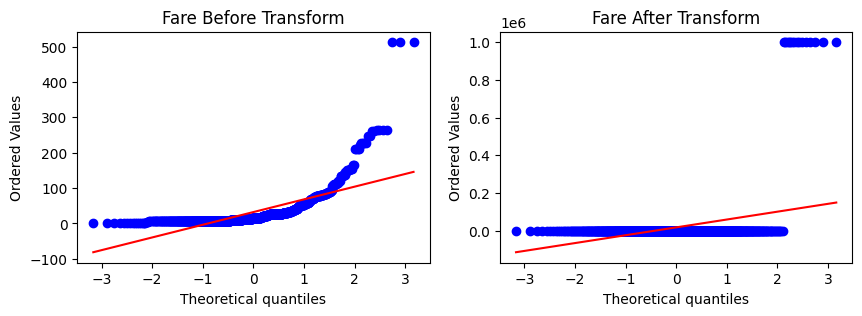

In [ ]:
apply_transform(lambda x: 1/(x+0.000001))

can also pass other transformers in the function

# 3. Square transform

Accuracy:  0.6464646464646465


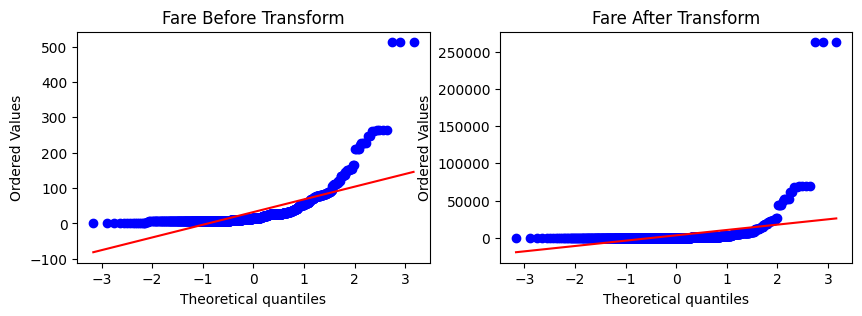

In [ ]:
apply_transform(lambda x: x**2)

# 4. Square root transform

Accuracy:  0.6565656565656566


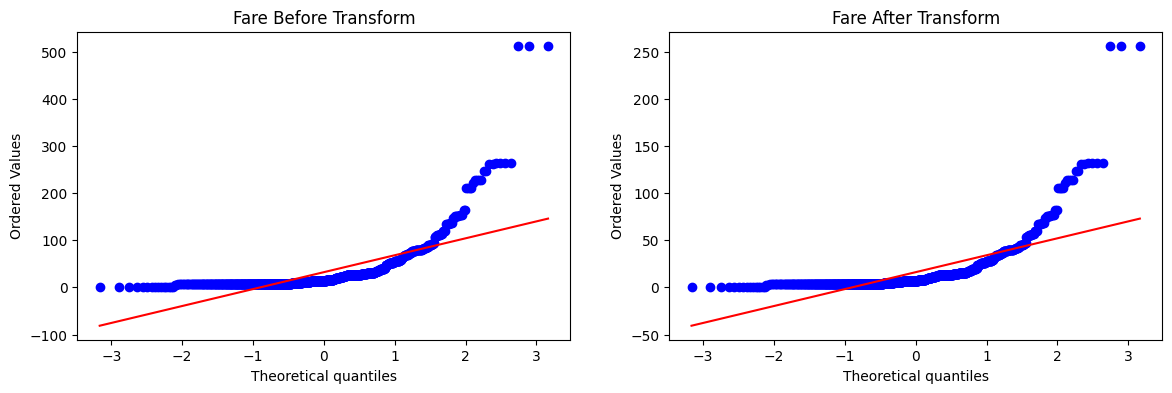

In [ ]:
apply_transform(lambda x: x*(1/2))